# 1. Importing Modules and Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

# 2. Importing and Investigating the Data.

In [ ]:
df = pd.read_csv(r'/kaggle/input/ai-impact-on-jobs-2030/AI_Impact_on_Jobs_2030.csv')
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


### My Take:
- There seem to be columns named skills 1 to 10 we don't know what these skills are but we'll have tofind a way to get them.

# 3. Data Validation

## 3.1 Checking for Null Values & Missing Value Percentage

In [ ]:
# checking the sum of missing values

df.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

No need to calculate the Missing percentage now.

## 3.2 Checking for Duplicates

In [ ]:
df.duplicated().sum()

0

## 3.3 Descriptive Statistics

In [ ]:
df.describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

### My Take:
 - With Standard deviation of $34,608 we can confidently say there is a significant variation across jobs, we'll look at factors causing this later in the analysis process.

 - Other factors seem to be average right now, we'll do more statistical analysis later to confirm.

# 4.  Deeper Exploratory Analysis & Visualizations.

## 4.1 Univariate Analysis for Numerical Data

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
numerical_cols = [col for col in numerical_cols if "skill" not in col.lower()]
numerical_cols

['Average_Salary',
 'Years_Experience',
 'AI_Exposure_Index',
 'Tech_Growth_Factor',
 'Automation_Probability_2030']

In [ ]:
# Distriptive statistics, will transpose for better viewing.

numerical_summary = df[numerical_cols].describe().T
print(numerical_summary)

                              count          mean           std       min  \
Average_Salary               3000.0  89372.279000  34608.088767  30030.00   
Years_Experience             3000.0     14.677667      8.739788      0.00   
AI_Exposure_Index            3000.0      0.501283      0.284004      0.00   
Tech_Growth_Factor           3000.0      0.995343      0.287669      0.50   
Automation_Probability_2030  3000.0      0.501503      0.247881      0.05   

                                  25%      50%        75%        max  
Average_Salary               58640.00  89318.0  119086.50  149798.00  
Years_Experience                 7.00     15.0      22.00      29.00  
AI_Exposure_Index                0.26      0.5       0.74       1.00  
Tech_Growth_Factor               0.74      1.0       1.24       1.50  
Automation_Probability_2030      0.31      0.5       0.70       0.95  


In [ ]:
# Calculating tht skewness and kurtosis.

distribution_metrics = df[numerical_cols].agg(["skew", "kurtosis"])
print("Distribution Shape")
print(distribution_metrics)

Distribution Shape
          Average_Salary  Years_Experience  AI_Exposure_Index  \
skew            0.011552         -0.008568          -0.016681   
kurtosis       -1.218513         -1.216893          -1.151322   

          Tech_Growth_Factor  Automation_Probability_2030  
skew               -0.013538                     0.010027  
kurtosis           -1.186597                    -1.046666  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0, 'AI Exposure Index (0 to 1)')

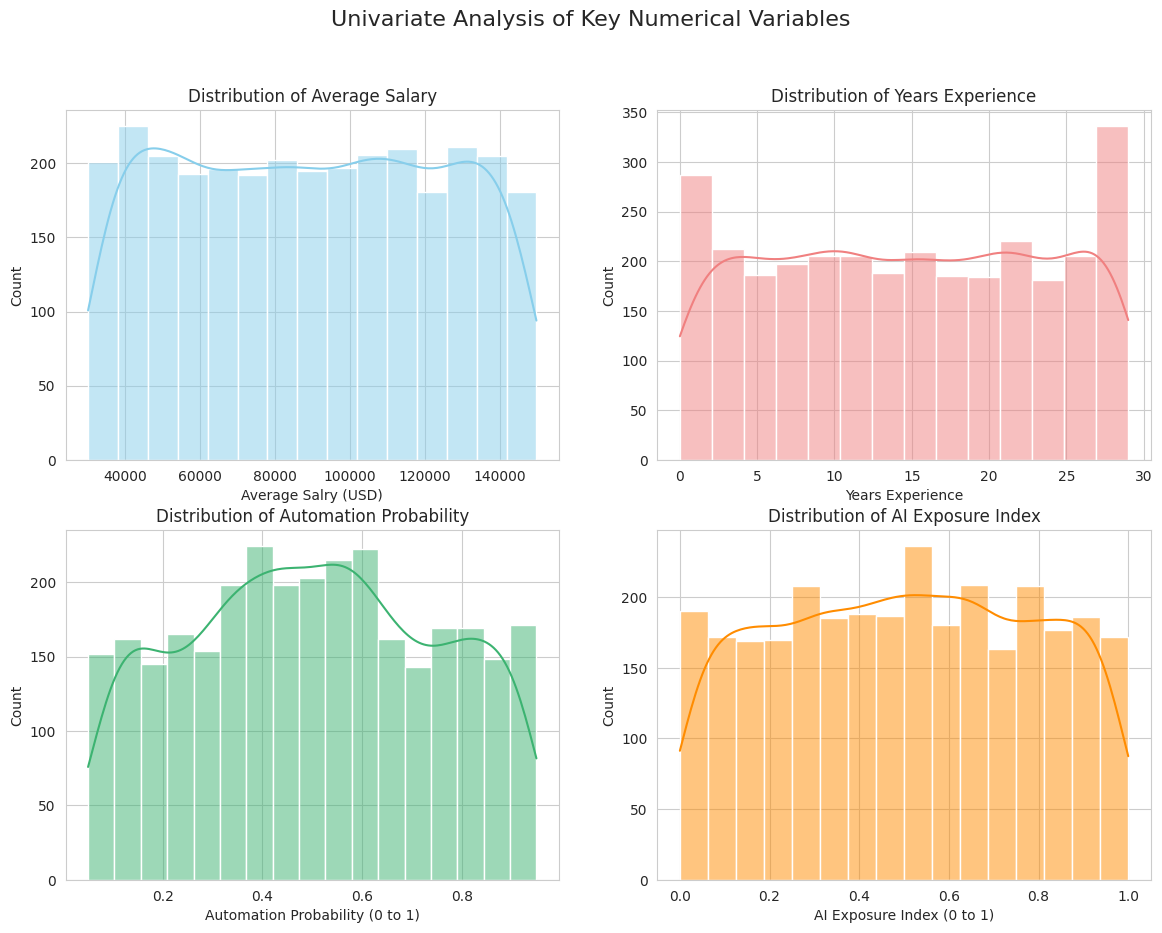

In [ ]:
# Lets do some visualizations to check for outliers and more distributions.

sns.set_style("whitegrid")

# figure and subplots for univariate numerical analysis.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Univariate Analysis of Key Numerical Variables', fontsize=16)

# 1. Average Salary Distributions.
sns.histplot(df['Average_Salary'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Average Salary')
axes[0,0].ticklabel_format(style='plain', axis='x')
axes[0, 0].set_xlabel('Average Salry (USD)')


# 2. Automation probability.
sns.histplot(df['Automation_Probability_2030'], kde=True, ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Distribution of Automation Probability')
axes[1, 0].set_xlabel('Automation Probability (0 to 1)')

# 3. Years of experience distribution.
sns.histplot(df['Years_Experience'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Years Experience')
axes[0, 1].set_xlabel('Years Experience')

# 4. AI Exposure Index Distribution
sns.histplot(df['AI_Exposure_Index'], kde=True, ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Distribution of AI Exposure Index')
axes[1, 1].set_xlabel('AI Exposure Index (0 to 1)')

## 4.2 Univariate Analysis for Categorical Data

In [ ]:
risk_distribution = df['Risk_Category'].value_counts(normalize=False).rename('Count')
risk_percentage = df['Risk_Category'].value_counts(normalize=True).mul(100).rename('Percentage')

education_distribution = df['Education_Level'].value_counts(normalize=False).rename('Count')
education_percentage = df['Education_Level'].value_counts(normalize=True).mul(100).rename('Percentage')

print("\n### Risk Category Distribution")
print(pd.concat([risk_distribution, risk_percentage], axis=1))

print("\n### Education Level Distribution")
print(pd.concat([education_distribution, education_percentage], axis=1))


### Risk Category Distribution
               Count  Percentage
Risk_Category                   
Medium          1521   50.700000
High             740   24.666667
Low              739   24.633333

### Education Level Distribution
                 Count  Percentage
Education_Level                   
High School        784   26.133333
Bachelor's         765   25.500000
Master's           735   24.500000
PhD                716   23.866667


## 4.3 Bivariate Analysis

In [ ]:
# Group by Risk_Category and calculate the mean for Salary and Experience
risk_bivariate_analysis = df.groupby('Risk_Category')[['Average_Salary', 'Years_Experience', 'Automation_Probability_2030', 'AI_Exposure_Index']].mean().reset_index()

# Rename columns for clarity
risk_bivariate_analysis.columns = ['Risk_Category', 'Avg_Salary_Mean', 'Exp_Mean', 'Auto_Prob_Mean', 'AI_Exposure_Mean']

print("\n### Mean Salary, Experience, and AI Factors by Risk Category")
print(risk_bivariate_analysis.sort_values(by='Avg_Salary_Mean', ascending=False))


### Mean Salary, Experience, and AI Factors by Risk Category
  Risk_Category  Avg_Salary_Mean   Exp_Mean  Auto_Prob_Mean  AI_Exposure_Mean
2        Medium     90451.414859  14.742932        0.499783          0.499658
1           Low     89166.776725  14.723951        0.176604          0.496049
0          High     87359.441892  14.497297        0.829500          0.509851


In [ ]:
# Calculate correlation between the four primary numerical variables
primary_correlations = df[['Average_Salary', 'Years_Experience', 'Automation_Probability_2030', 'AI_Exposure_Index']].corr()

print("\n### Primary Correlation Matrix (Core Factors)")
print(primary_correlations)


### Primary Correlation Matrix (Core Factors)
                             Average_Salary  Years_Experience  \
Average_Salary                     1.000000          0.017389   
Years_Experience                   0.017389          1.000000   
Automation_Probability_2030       -0.013367         -0.017676   
AI_Exposure_Index                 -0.020196          0.034599   

                             Automation_Probability_2030  AI_Exposure_Index  
Average_Salary                                 -0.013367          -0.020196  
Years_Experience                               -0.017676           0.034599  
Automation_Probability_2030                     1.000000           0.014320  
AI_Exposure_Index                               0.014320           1.000000  


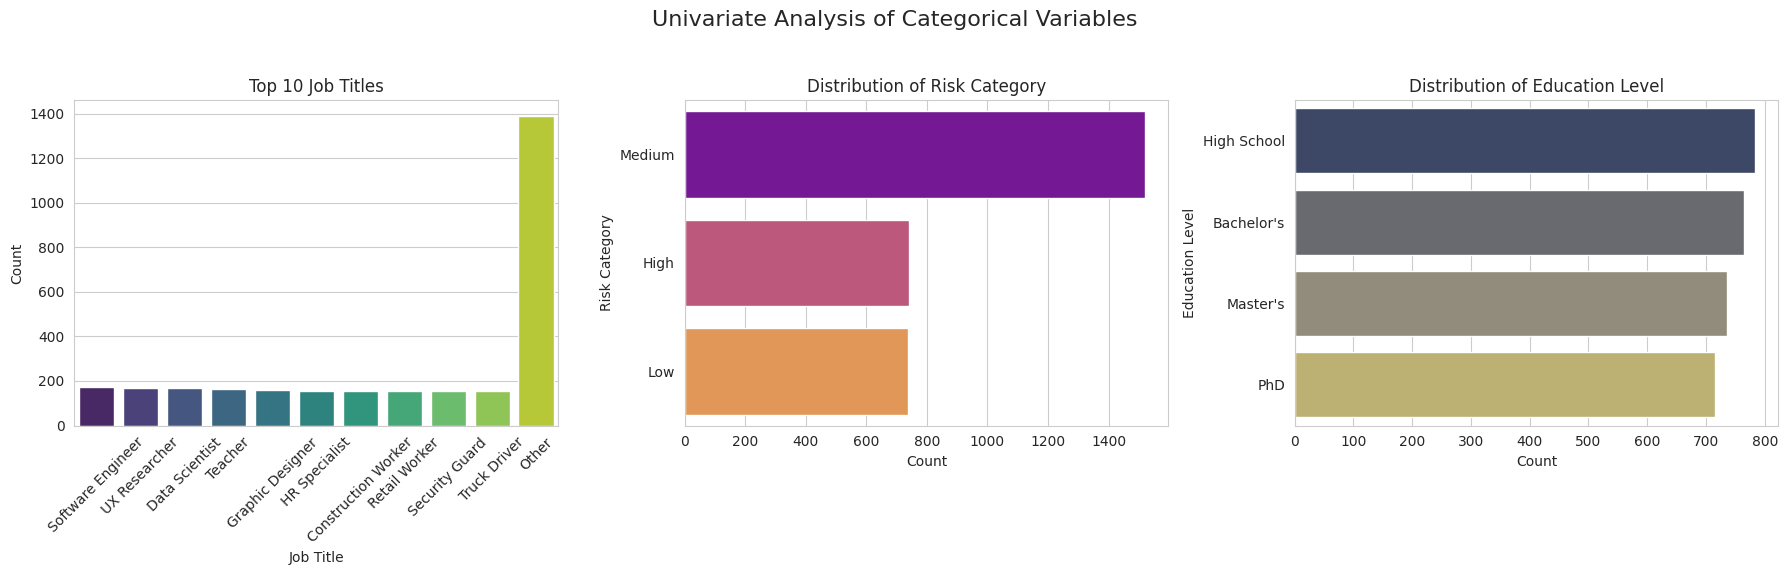

In [ ]:
top_jobs = df['Job_Title'].value_counts().nlargest(10)
other_jobs_count = len(df) - top_jobs.sum()
job_counts_to_plot = pd.concat([top_jobs, pd.Series([other_jobs_count], index=['Other'])])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Univariate Analysis of Categorical Variables', fontsize=16)

# Job Title Counts (Top 10 + Other)
sns.barplot(x=job_counts_to_plot.index, y=job_counts_to_plot.values, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Job Titles')
axes[0].set_xlabel('Job Title')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Risk Category Counts
sns.countplot(y=df['Risk_Category'], order=df['Risk_Category'].value_counts().index, ax=axes[1], palette='plasma')
axes[1].set_title('Distribution of Risk Category')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Risk Category')

# Education Level Counts
sns.countplot(y=df['Education_Level'], order=df['Education_Level'].value_counts().index, ax=axes[2], palette='cividis')
axes[2].set_title('Distribution of Education Level')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Education Level')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('univariate_categorical_analysis.png')
plt.show()

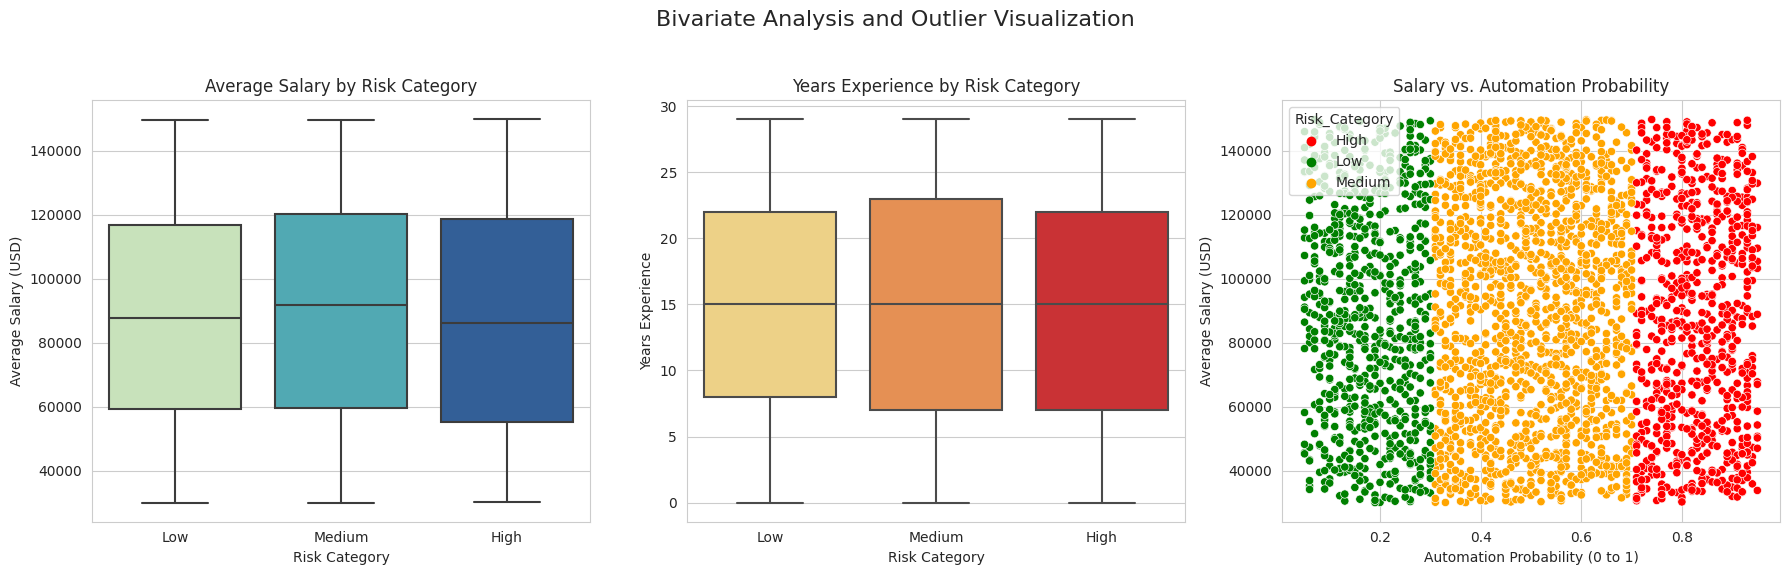

In [ ]:
# --- 2. Bivariate Analysis and Outlier Check (using Boxplots) ---

# Check for relationship between Salary/Experience and Risk Category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Bivariate Analysis and Outlier Visualization', fontsize=16)

# Salary by Risk Category (Outliers are points outside the whiskers)
sns.boxplot(x='Risk_Category', y='Average_Salary', data=df, order=['Low', 'Medium', 'High'], ax=axes[0], palette='YlGnBu')
axes[0].set_title('Average Salary by Risk Category')
axes[0].set_xlabel('Risk Category')
axes[0].set_ylabel('Average Salary (USD)')
axes[0].ticklabel_format(style='plain', axis='y')

# Years Experience by Risk Category (Outliers are points outside the whiskers)
sns.boxplot(x='Risk_Category', y='Years_Experience', data=df, order=['Low', 'Medium', 'High'], ax=axes[1], palette='YlOrRd')
axes[1].set_title('Years Experience by Risk Category')
axes[1].set_xlabel('Risk Category')
axes[1].set_ylabel('Years Experience')

# Automation Probability vs. Average Salary (Bivariate scatter)
sns.scatterplot(x='Automation_Probability_2030', y='Average_Salary', hue='Risk_Category', data=df, ax=axes[2], palette={'Low': 'green', 'Medium': 'orange', 'High': 'red'})
axes[2].set_title('Salary vs. Automation Probability')
axes[2].set_xlabel('Automation Probability (0 to 1)')
axes[2].set_ylabel('Average Salary (USD)')
axes[2].ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('bivariate_analysis.png')
plt.show()

## 4.4 Correlation check

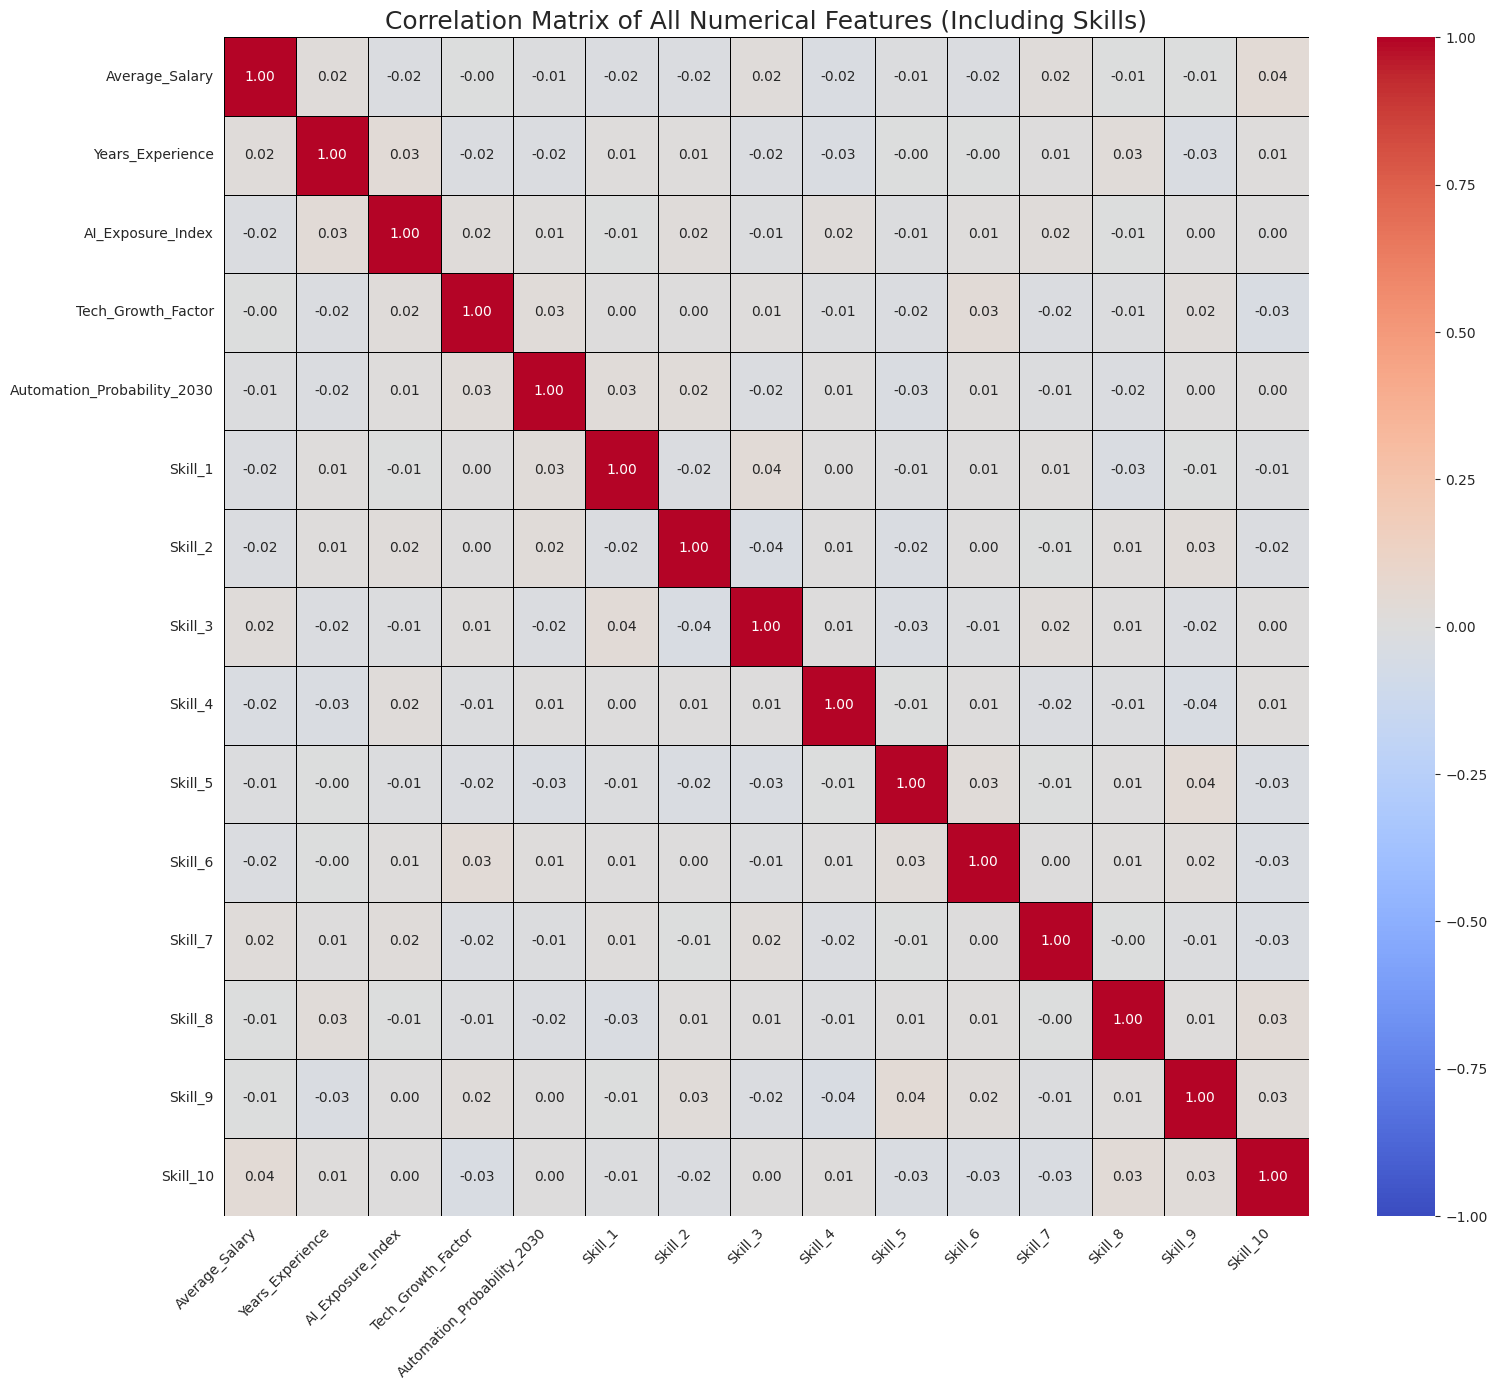

Code ready to run. Output will include four files: univariate_numerical_analysis.png, univariate_categorical_analysis.png, bivariate_analysis.png, and the crucial correlation_matrix.png/correlation_matrix_results.csv for skill analysis.


In [ ]:
# Select all numerical columns, including the 10 Skill columns
numerical_cols = ['Average_Salary', 'Years_Experience', 'AI_Exposure_Index', 'Tech_Growth_Factor', 'Automation_Probability_2030'] + [f'Skill_{i}' for i in range(1, 11)]

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 14))
# Use vmin/vmax to center the colorscale around 0, important for correlation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Numerical Features (Including Skills)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Save the correlation matrix to a CSV for detailed inspection (especially skill correlations)
correlation_matrix.to_csv('correlation_matrix_results.csv')

print("Code ready to run. Output will include four files: univariate_numerical_analysis.png, univariate_categorical_analysis.png, bivariate_analysis.png, and the crucial correlation_matrix.png/correlation_matrix_results.csv for skill analysis.")

In [ ]:
# Getting the skill correlations.

external_factors = ['Average_Salary', 'Automation_Probability_2030', 'AI_Exposure_Index', 'Tech_Growth_Factor']

skill_cols = [f'Skill_{i}' for i in range(1, 11)]
all_cols = external_factors + skill_cols
full_correlation_matrix = df[all_cols].corr()

skill_correlations = full_correlation_matrix.loc[
    skill_cols,
    external_factors
]

print("\n### Correlation of Skill Dimensions with Key External Factors")
print(skill_correlations.T)


### Correlation of Skill Dimensions with Key External Factors
                              Skill_1   Skill_2   Skill_3   Skill_4   Skill_5  \
Average_Salary              -0.016888 -0.021382  0.019271 -0.024862 -0.010809   
Automation_Probability_2030  0.030947  0.024247 -0.020198  0.005963 -0.026349   
AI_Exposure_Index           -0.005675  0.018888 -0.011234  0.022386 -0.010878   
Tech_Growth_Factor           0.001253  0.004276  0.007915 -0.013198 -0.017557   

                              Skill_6   Skill_7   Skill_8   Skill_9  Skill_10  
Average_Salary              -0.015895  0.017232 -0.005487 -0.007120  0.041655  
Automation_Probability_2030  0.011701 -0.010226 -0.016452  0.001269  0.002665  
AI_Exposure_Index            0.008196  0.016615 -0.007744  0.003171  0.004656  
Tech_Growth_Factor           0.034580 -0.020690 -0.011194  0.017333 -0.033288  


### MY TAKE
- Co-efficients are extremely close to zero indicating there's no linear correlation between Average Salary, Years Experience, Automation Probability, AI exposure.
- Skewness - all values are very close to zero, confirming highly symmetrical distribution - no skew.
- Kurtosis - Indicate distributions are flatter than a normal distribution.
- Mean Factors by Risk Category - Medium risk jobs have the highest average salary, high risk jobs have the lowest average salary, low risk jobs fall in the middle.
#### Attempting to group the skills.
- skill_10 is best indicator of higher salary among the 10 skills-something scrace, specialized highly compensated.
- skill_1 & 2 re associated with jobs likely to be automated - must be routine, repetitive or easily handled by machines.
- skills_5 & 3 are associated with jobs least likely to be automated - uniquey human

## 4.5 Creating Composite Skill Scores

In [ ]:
# Creating the composite skill scores

df['Future_Proof_Score'] = df[['Skill_5', 'Skill_3']].mean(axis=1)

df['High_Risk_Score'] = df[['Skill_1', 'Skill_2']].mean(axis=1)

df['High_Value_Score'] = df[['Skill_10', 'Skill_6']].mean(axis=1)

In [ ]:
# composote skill scores by risk category.

composite_skill_summary = df.groupby('Risk_Category')[['Future_Proof_Score', 'High_Risk_Score', 'High_Value_Score']].mean()

print("Composite Skill Score Averages by Risk Category")
print(composite_skill_summary.sort_values(by='High_Risk_Score', ascending=False))

Composite Skill Score Averages by Risk Category
               Future_Proof_Score  High_Risk_Score  High_Value_Score
Risk_Category                                                       
High                     0.491446         0.511061          0.496703
Medium                   0.490950         0.493432          0.501364
Low                      0.506049         0.490683          0.487165


<Figure size 1000x600 with 0 Axes>

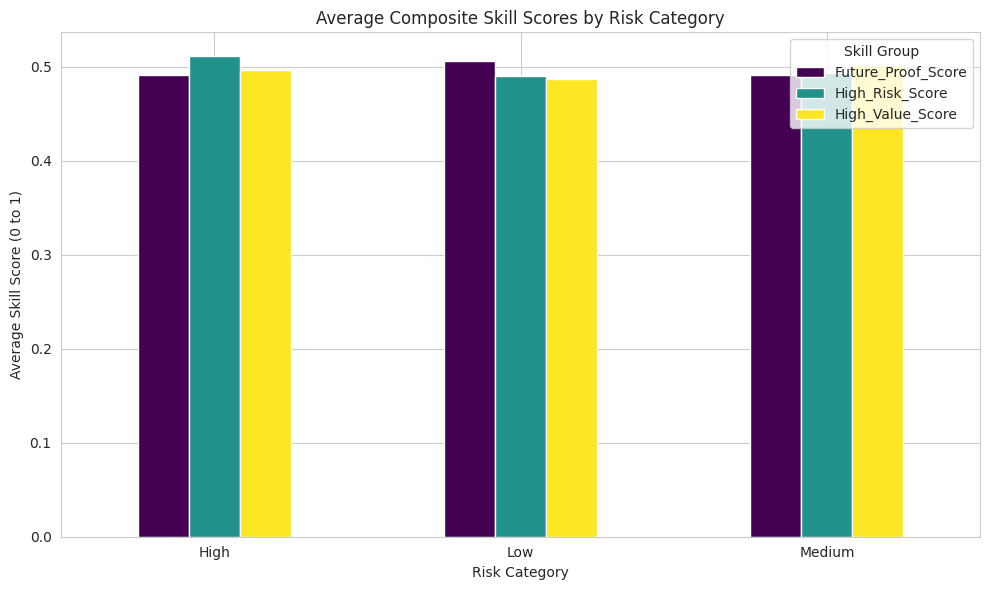

In [ ]:
# Visualize the composite scores by Risk Category
plt.figure(figsize=(10, 6))
composite_skill_summary.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Composite Skill Scores by Risk Category')
plt.ylabel('Average Skill Score (0 to 1)')
plt.xlabel('Risk Category')
plt.xticks(rotation=0)
plt.legend(title='Skill Group')
plt.tight_layout()
plt.savefig('composite_skill_scores_by_risk.png')
plt.show()

## 4.6 Education Level Vs Salary


 Salary Metrics by Education Level
                         mean   median  count
Education_Level                              
High School      88389.293367  87709.5    784
Bachelor's       88815.495425  89309.0    765
Master's         91318.564626  92086.0    735
PhD              89045.575419  87818.5    716


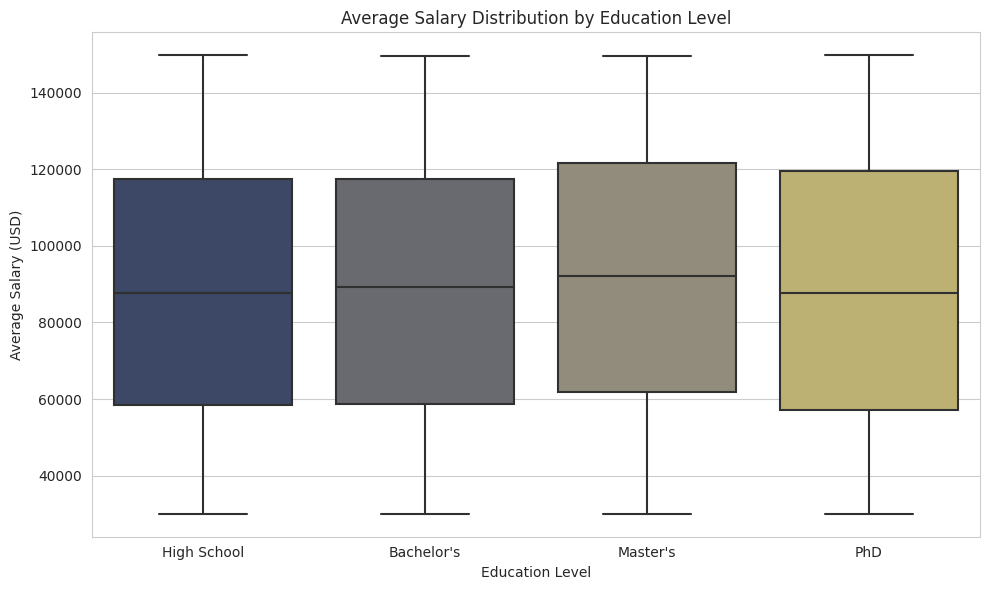

In [ ]:
education_salary_summary = df.groupby('Education_Level')['Average_Salary'].agg(['mean', 'median', 'count'])

education_order = ["High School", "Bachelor's", "Master's", "PhD"]
education_salary_summary = education_salary_summary.reindex(education_order)

print("\n Salary Metrics by Education Level")
print(education_salary_summary)

# Visualize the Salary Distribution by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Level', y='Average_Salary', data=df, order=education_order, palette='cividis')
plt.title('Average Salary Distribution by Education Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Education Level')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('salary_by_education_boxplot.png')
plt.show()

### MY TAKE
- Our inference fir skills1 & 2 is strongly validated - jobs in the high automation risk bracket are characterized by a slightly higher proficiency in skills that are easily replaced by machines.
- Our inference for Skills 3 & 5 (Creativity/Strategic Thinking) is also strongly validated. Jobs with low automation risk are characterized by a slightly higher demand for complex, human-centric cognitive skills.
- Masters holders seem to be paid more, more than pHD holders.

# 5. Inferential Statistical Analysis

## 5.1 Anova Tests

In [ ]:
# Hypothesis: Are the mean salaries across the four education groups significantly different?

formula_edu = 'Average_Salary ~ C(Education_Level)'
lm_edu = ols(formula_edu, data=df).fit()
anova_table_edu = anova_lm(lm_edu)
print(anova_table_edu)

### 1. ANOVA: Average Salary by Education Level ###
                        df        sum_sq       mean_sq         F    PR(>F)
C(Education_Level)     3.0  3.855327e+09  1.285109e+09  1.073041  0.359229
Residual            2996.0  3.588106e+12  1.197632e+09       NaN       NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
# Hypothesis: Are the mean salaries across the three risk categories significantly different?

formula_risk = 'Average_Salary ~ C(Risk_Category)'
lm_risk = ols(formula_risk, data=df).fit()
anova_table_risk = anova_lm(lm_risk)
print(anova_table_risk)

### 2. ANOVA: Average Salary by Risk Category ###
                      df        sum_sq       mean_sq         F    PR(>F)
C(Risk_Category)     2.0  4.800585e+09  2.400293e+09  2.005396  0.134788
Residual          2997.0  3.587161e+12  1.196917e+09       NaN       NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## 5.2 T-Tests

In [ ]:
# Re-create Composite Skill Scores
df['Future_Proof_Score'] = df[['Skill_5', 'Skill_3']].mean(axis=1)
df['High_Risk_Score'] = df[['Skill_1', 'Skill_2']].mean(axis=1)

3. T-Tests on Composite Scores (High Risk vs. Low Risk Jobs)
print("### 3. T-Tests: Composite Skill Scores by Extreme Risk Categories ###")

# Separate extreme risk groups
high_risk_group = df[df['Risk_Category'] == 'High']
low_risk_group = df[df['Risk_Category'] == 'Low']

# T-Test 1: High_Risk_Score comparison

# Expected: High Risk Jobs have a significantly higher High_Risk_Score.
t_stat_hr, p_value_hr = stats.ttest_ind(
    high_risk_group['High_Risk_Score'],
    low_risk_group['High_Risk_Score'],
    equal_var=True
)
print("T-Test 1: High_Risk_Score (High Risk Jobs vs. Low Risk Jobs)")
print(f"  T-statistic: {t_stat_hr:.4f}")
print(f"  P-value: {p_value_hr:.4f} (Should be < 0.05 for significance)")
print(f"  Mean Difference (High - Low): {high_risk_group['High_Risk_Score'].mean() - low_risk_group['High_Risk_Score'].mean():.4f}")

### 3. T-Tests: Composite Skill Scores by Extreme Risk Categories ###
T-Test 1: High_Risk_Score (High Risk Jobs vs. Low Risk Jobs)
  T-statistic: 1.9294
  P-value: 0.0539 (Should be < 0.05 for significance)
  Mean Difference (High - Low): 0.0204


In [ ]:
# T-Test 2: Future_Proof_Score comparison

# Expected: Low Risk Jobs have a significantly higher Future_Proof_Score.
t_stat_fp, p_value_fp = stats.ttest_ind(
    low_risk_group['Future_Proof_Score'],
    high_risk_group['Future_Proof_Score'],
    equal_var=True
)
print("\nT-Test 2: Future_Proof_Score (Low Risk Jobs vs. High Risk Jobs)")
print(f"  T-statistic: {t_stat_fp:.4f}")
print(f"  P-value: {p_value_fp:.4f} (Should be < 0.05 for significance)")
print(f"  Mean Difference (Low - High): {low_risk_group['Future_Proof_Score'].mean() - high_risk_group['Future_Proof_Score'].mean():.4f}")


T-Test 2: Future_Proof_Score (Low Risk Jobs vs. High Risk Jobs)
  T-statistic: 1.4199
  P-value: 0.1559 (Should be < 0.05 for significance)
  Mean Difference (Low - High): 0.0146


### MY TAKE
#### Anova Analysis
- Salary is highly randomized in the dataset, simple categories such as education and automation risk are not kwy drivers of pay.

#### T-test
- The tendancy of low-risk jobs to have hghigher cognitive scores is too weak.
- High risk score - This is just over the $0.05$ threshold, but it's the strongest pattern we have. It suggests a weak tendency for high-risk jobs to have slightly higher routine skill scores.

- What all this data suggests is that it's too randomized, probably not legit data collected from actual individuals, just generated.

# 6. Predictive Analysis

In [ ]:
df['Future_Proof_Score'] = df[['Skill_5', 'Skill_3']].mean(axis=1)
df['High_Risk_Score'] = df[['Skill_1', 'Skill_2']].mean(axis=1)
df['High_Value_Score'] = df[['Skill_10', 'Skill_6']].mean(axis=1)

# --- Define Features (X) and Target (y) ---
# Features: All three composite skill scores + One-Hot Encoded Education Level
features = ['Future_Proof_Score', 'High_Risk_Score', 'High_Value_Score', 'Years_Experience']
categorical_features = ['Education_Level']

# One-Hot Encode the categorical variable
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Add the new encoded columns to the features list
encoded_education_cols = [col for col in df_processed.columns if 'Education_Level_' in col]
X = df_processed[features + encoded_education_cols]
y = df_processed['Risk_Category']

# --- Split Data for Training and Testing ---
# We use a 70/30 split to train the model and test it on unseen data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## 6.2 Model Training and Evalutaion

### Model Performance Metrics ###
Overall Accuracy: 0.4844 (Baseline: 0.3333)

Classification Report:
              precision    recall  f1-score   support

        High       0.25      0.04      0.07       222
         Low       0.12      0.01      0.02       222
      Medium       0.51      0.93      0.66       456

    accuracy                           0.48       900
   macro avg       0.29      0.33      0.25       900
weighted avg       0.35      0.48      0.36       900


Top 5 Feature Importances (Higher value = more relied upon by model):
Future_Proof_Score          0.294353
High_Value_Score            0.277763
Years_Experience            0.200613
High_Risk_Score             0.198313
Education_Level_Master's    0.028958
dtype: float64


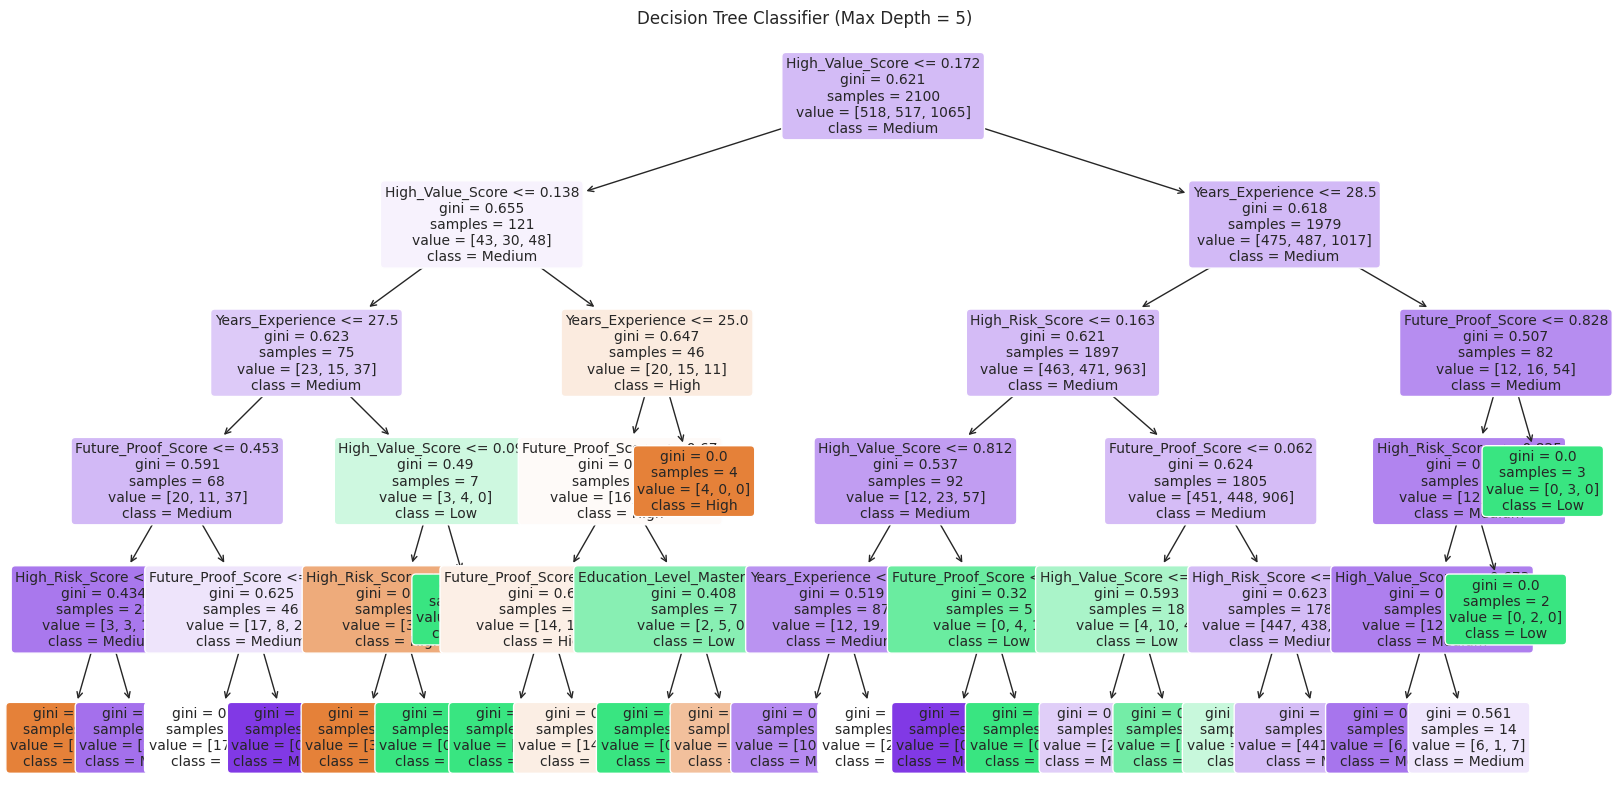

In [ ]:
# --- Model Training ---
# Initializing the Decision Tree Classifier
# We set max_depth to limit the complexity and prevent overfitting.
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# --- Prediction and Evaluation ---
# Predicting the Risk Category on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"### Model Performance Metrics ###")
print(f"Overall Accuracy: {accuracy:.4f} (Baseline: {1/3:.4f})") # Baseline is 33.3% for a random guess

# Generating a detailed classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Feature Importance ---
# Identifying which features the model relied on the most
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Feature Importances (Higher value = more relied upon by model):")
print(feature_importances.head(5))


# --- Visualizing the Decision Tree (Optional but highly recommended) ---
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=model.classes_.tolist(),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Classifier (Max Depth = 5)")
plt.savefig('decision_tree_visualization.png')
plt.show()

### MY TAKE
- Model performs better than random guessing but its only accuracte 48% of the time, this further indicates that relationships between skills/education and risk are weak in the dataset.

- Model is biased towards 'Medium Risk', after investogations i concluded its because hald the data is medium risk so the model chooses it as the safest bet. Could be easily fixed but we are not going to as this dataset has proven to be unreliable.

- Model confirms that future-proof skills and high-value skills are the best predictors, despite low correlations scores we saw earlier.

# 7. Final Conclusion

- Salary is statistically unrelated to both education level and risk category.
- Predictive model confirms that distinguishing between three risk categories is extremely difficult due to the high level of randomness in the synthetic data.